<h2 style='color:purple'>Exercise</h2>

Implement mini batch gradient descent in python and plot the cost vs epoch graph.

Mini batch is an intermediate version of batch GD and stochastic GD. In stochastic we used one randomly picked training sample. 

In mini gradient descent you will use a batch of samples in each iterations. For example if you have total 50 training samples, you can take a batch of 10 samples, calculate cumulitive error for those 10 samples and then adjust weights. 

In SGD we adjust weights after every one sample. In Batch we adjust weights after going through all samples but in mini batch we do after every m samples (where m is batch size and it is 0 < m < n, where n is total number of samples.

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt

from sklearn import preprocessing

import random

In [2]:
df = pd.read_csv("data\\homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


## Scaling the Dataset, for better performance

In [3]:
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(df.drop("price", axis="columns"))  # Bring the included columns in 0-1 scale
scaled_y = sy.fit_transform(df["price"].values.reshape(df.shape[0], 1))  # Bring the included columns in 0-1 scale

In [4]:
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [5]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [28]:
def mini_batch_gradient_descent(x, y_true, epochs, batches, learning_rate = 0.01):
    
    if batches > len(x):  # Making sure the batch size isn't higher than our num of samples.
        batches = len(x)
    
    number_of_features = x.shape[1]  # 3 features: area, bedroom and age
    w = np.ones(shape=(number_of_features))  # Initializing the weights as ones, with the same shape as number_of_features
    b = 0  # Initilize bias as 0
    total_samples = x.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):  # In each iteration, we will use all training samples to do training
        random_indices = np.random.permutation(total_samples)
        x_rnd = x[random_indices]  # x and y with their indices shuffled
        y_rnd = y_true[random_indices]
        
        for j in range(0, total_samples, batches):
            xj = x_rnd[j:j+batches]
            yj = y_rnd[j:j+batches]
            y_pred = np.dot(w, xj.T) + b
            
            # Partial Derivatives, finding the gradients.
            w_grad = -(2/len(xj)) * (xj.T.dot(yj - y_pred))
            b_grad = -(2/len(xj)) * np.sum(yj - y_pred)
        
            # Adjusting weight and bias  (w/b - LearningRate * Derivative)
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
            
            # Mean Square Error (MSE)
            square_error = np.square(yj - y_pred)
            cost = np.mean(square_error)
            
            if i%10==0:
                cost_list.append(cost)
                epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0], ), 120, 5)

In [29]:
w, b, cost

(array([0.71001167, 0.67814895]), -0.23330086696267305, 0.0041891779700003)

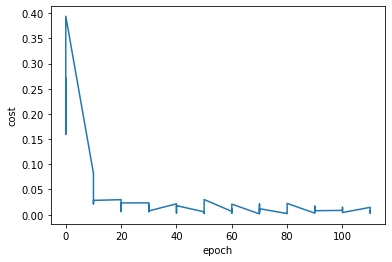

In [30]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)